In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Exploration notebook shows 54309 Monthly factors!!

In [2]:
monthly_crude = pd.read_csv('./monthly_crude_data.csv',index_col='index',parse_dates=True)
monthly_crude.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1170 entries, 1920-01-31 to 2017-06-30
Columns: 54309 entries, PET.EMM_EPMM_PTE_SFL_DPG.M to PET.MBAEXUS2.M
dtypes: float64(54309)
memory usage: 484.8 MB


### Lets look at the Monthly Data

In [3]:
monthly_crude.count().head(15)

PET.EMM_EPMM_PTE_SFL_DPG.M    169
PET.EMM_EPMR_PTE_SWA_DPG.M    169
PET.EMM_EPMR_PTE_SOH_DPG.M    169
PET.EMM_EPMM_PTE_R40_DPG.M    271
PET.EMM_EPMM_PTE_R50_DPG.M    271
PET.EMM_EPM0_PTE_STX_DPG.M    205
PET.EMM_EPMR_PTE_SNY_DPG.M    205
PET.EMM_EPMM_PTE_SWA_DPG.M    169
PET.EMM_EPMP_PTE_NUS_DPG.M    271
PET.EMM_EPMP_PTE_R10_DPG.M    271
PET.EMM_EPMP_PTE_R1X_DPG.M    271
PET.EMM_EPMP_PTE_R1Y_DPG.M    271
PET.EMM_EPMP_PTE_R1Z_DPG.M    271
PET.EMM_EPMP_PTE_R20_DPG.M    271
PET.EMM_EPMP_PTE_R30_DPG.M    271
dtype: int64

### Let's make sure that the Price data is available

In [4]:
df = monthly_crude[['PET.RCLC1.M','PET.RCLC2.M','PET.RCLC3.M','PET.RCLC4.M','PET.RWTC.M']]
df.tail()

,PET.RCLC1.M,PET.RCLC2.M,PET.RCLC3.M,PET.RCLC4.M,PET.RWTC.M
index,,,,,
2017-02-28,53.46,53.93,54.32,54.64,53.47
2017-03-31,49.67,50.22,50.61,50.91,49.33
2017-04-30,51.12,51.52,51.84,52.09,51.06
2017-05-31,48.54,48.86,49.12,49.34,48.48
2017-06-30,NaN,NaN,NaN,NaN,NaN


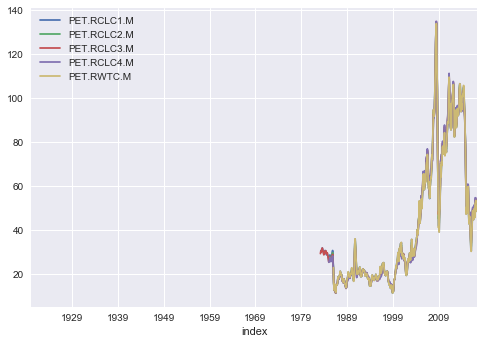

In [5]:
df.plot()
plt.show()

### Spot Price starts January 1986

In [6]:
print ('Spot Price has '+ str(df['PET.RWTC.M'].count())+' months of Data')

#find date where data starts
monthly_crude['PET.RWTC.M'][-df['PET.RWTC.M'].count():].head()

Spot Price has 377 months of Data


index
1986-02-28    15.46
1986-03-31    12.61
1986-04-30    12.84
1986-05-31    15.38
1986-06-30    13.43
Name: PET.RWTC.M, dtype: float64

### 'PET.RWTC.M' Will be the value we are trying to predict

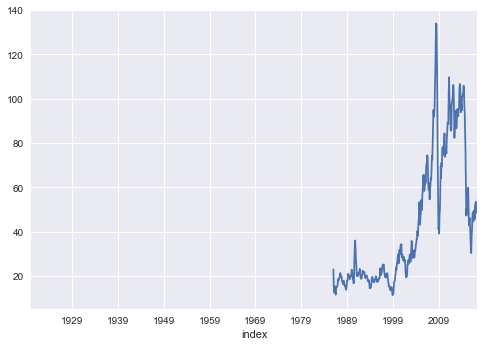

In [7]:
monthly_crude['PET.RWTC.M'].plot()

## Prepare dateset for Dimensionality Reduction

In [66]:
# Set all data series to start January 1986
monthly_crude = monthly_crude.loc['1986-01-31':]

# Remove columns that are missing more than 10% of values
monthly_dataset = monthly_crude[monthly_crude.columns[monthly_crude.count() >= (.90 * monthly_crude['PET.RWTC.M'].count())]]


#fill in values instead of NaN's
monthly_dataset.fillna(method='ffill',axis=0,inplace=True)
monthly_dataset.fillna(0,inplace=True)

# Drop price Data
monthly_dataset = monthly_dataset.drop(['PET.RCLC1.M','PET.RCLC2.M','PET.RCLC3.M','PET.RCLC4.M','PET.RWTC.M'],axis=1)

monthly_dataset.tail(10)

/Users/Prometheus/Code/Chipy_Mentorship/venv3.6/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,PET.C130013451.M,PET.C130013511.M,PET.C140020001.M,PET.C300011251.M,PET.C400000001.M,PET.C400010001.M,PET.C400011001.M,PET.C400012001.M,PET.C100050021.M,PET.C100050041.M,...,PET.E_ERTRRG_XR0_NUS_C.M,PET.MMSIMP21.M,PET.METIMUS1.M,PET.METIMUS2.M,PET.MMSIMP22.M,PET.MPCEX_NUS-Z00_1.M,PET.MPCEX_NUS-Z00_2.M,PET.MNFEXUS2.M,PET.MPFEXP31.M,PET.MPFEXP32.M
index,,,,,,,,,,,,,,,,,,,,,
2016-09-30,629.9,1135.5,1705.3,27.0,448.2,134.5,20.0,31.2,765.5,8304.3,...,86.0,1.0,43.0,1.0,0.0,634.0,20.0,20.0,450.0,15.0
2016-10-31,661.0,1196.9,1660.5,27.0,405.1,114.9,15.1,25.3,701.5,8409.6,...,86.0,1.0,43.0,1.0,0.0,634.0,20.0,20.0,450.0,15.0
2016-11-30,633.1,1175.2,1642.0,27.0,423.7,141.4,14.8,25.3,668.5,8278.1,...,86.0,1.0,43.0,1.0,0.0,634.0,20.0,20.0,450.0,15.0
2016-12-31,619.0,1125.5,1637.8,153.6,427.1,103.3,10.1,18.0,708.5,8267.1,...,86.0,1.0,43.0,1.0,0.0,634.0,20.0,20.0,450.0,15.0
2017-01-31,549.4,1009.1,1435.8,153.6,281.4,100.6,8.1,15.4,664.9,7778.7,...,86.0,1.0,43.0,1.0,0.0,634.0,20.0,20.0,450.0,15.0
2017-02-28,584.4,1081.7,1466.9,153.6,339.4,120.3,11.3,18.8,664.0,8358.3,...,86.0,1.0,43.0,1.0,0.0,634.0,20.0,20.0,450.0,15.0
2017-03-31,636.7,1130.1,1513.6,153.6,396.9,126.7,9.0,15.0,701.2,8845.7,...,86.0,1.0,43.0,1.0,0.0,634.0,20.0,20.0,450.0,15.0
2017-04-30,659.6,1164.0,1539.1,153.6,403.8,128.5,10.9,25.2,679.4,8873.0,...,86.0,1.0,43.0,1.0,0.0,634.0,20.0,20.0,450.0,15.0
2017-05-31,659.6,1164.0,1539.1,153.6,403.8,128.5,10.9,25.2,679.4,8873.0,...,86.0,1.0,43.0,1.0,0.0,634.0,20.0,20.0,450.0,15.0


In [67]:
monthly_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378 entries, 1986-01-31 to 2017-06-30
Columns: 3864 entries, PET.C130013451.M to PET.MPFEXP32.M
dtypes: float64(3864)
memory usage: 11.1 MB


In [68]:
y = monthly_crude['PET.RWTC.M'].fillna(method='ffill').values

print(y.dtype)
print(np.shape(y))
y

float64
(378,)


array([  22.93,   15.46,   12.61,   12.84,   15.38,   13.43,   11.59,
         15.1 ,   14.87,   14.9 ,   15.22,   16.11,   18.65,   17.75,
         18.3 ,   18.68,   19.44,   20.07,   21.34,   20.31,   19.53,
         19.86,   18.85,   17.28,   17.13,   16.8 ,   16.2 ,   17.86,
         17.42,   16.53,   15.5 ,   15.52,   14.54,   13.77,   14.14,
         16.38,   18.02,   17.94,   19.48,   21.07,   20.12,   20.05,
         19.78,   18.58,   19.59,   20.1 ,   19.86,   21.1 ,   22.86,
         22.11,   20.39,   18.43,   18.2 ,   16.7 ,   18.45,   27.31,
         33.51,   36.04,   32.33,   27.28,   25.23,   20.48,   19.9 ,
         20.83,   21.23,   20.19,   21.4 ,   21.69,   21.89,   23.23,
         22.46,   19.5 ,   18.79,   19.01,   18.92,   20.23,   20.98,
         22.39,   21.78,   21.34,   21.88,   21.69,   20.34,   19.41,
         19.03,   20.09,   20.32,   20.25,   19.95,   19.09,   17.89,
         18.01,   17.5 ,   18.15,   16.61,   14.52,   15.03,   14.78,
         14.68,   16

# Dimensionality Reduction

### patrick notes on dim. redu. 
- run function to remove high multicolinearity
- run rfe again, appending to outside list of columns, until issue of multicolin is resolved

# RFE

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [80]:
#use linear regression as the model
lr_rfe = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr_rfe,step=20, n_features_to_select=20)
rfe.fit(monthly_dataset,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=20, step=20, verbose=0)

In [178]:
print ("Features sorted by their rank:")
tuple_list_rfe = (sorted(zip(map(lambda x: round(x, 2), rfe.ranking_), monthly_dataset.columns)))
# print (tuple_list_rfe)

Features sorted by their rank:


In [179]:
name_list_rfe = [x[1] for x in tuple_list_rfe if x[0] == 1]
name_list_rfe

['PET.C100020401.M',
 'PET.C100030281.M',
 'PET.C120020401.M',
 'PET.C120030281.M',
 'PET.EER_EPD2F_PE1_Y35NY_DPG.M',
 'PET.EER_EPD2F_PE3_Y35NY_DPG.M',
 'PET.EER_EPD2F_PF4_Y35NY_DPG.M',
 'PET.EER_EPMRU_PF4_RGC_DPG.M',
 'PET.EER_EPMRU_PF4_Y35NY_DPG.M',
 'PET.MAPEXP11.M',
 'PET.MAPEXP21.M',
 'PET.MAPEXUS1.M',
 'PET.MBCRI2B1.M',
 'PET.MBCRIAP1.M',
 'PET.MBCRIEC1.M',
 'PET.MBCRIP11.M',
 'PET.MPEMTP2P11.M',
 'PET.MTTMXP5P41.M',
 'PET.MUOMTP3P21.M',
 'PET.RBRTE.M']

In [219]:
results_rfe = monthly_dataset[name_list_rfe]
results_rfe.tail()

,PET.C100020401.M,PET.C100030281.M,PET.C120020401.M,PET.C120030281.M,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.MAPEXP11.M,PET.MAPEXP21.M,PET.MAPEXUS1.M,PET.MBCRI2B1.M,PET.MBCRIAP1.M,PET.MBCRIEC1.M,PET.MBCRIP11.M,PET.MPEMTP2P11.M,PET.MTTMXP5P41.M,PET.MUOMTP3P21.M,PET.RBRTE.M
index,,,,,,,,,,,,,,,,,,,,
2017-02-28,5854.3,4643.3,5365.3,4261.0,1.641,1.660,1.562,1.543,1.547,89.0,30.0,494.0,898.0,4746.0,57435.0,62181.0,62.0,1966.0,460.0,54.87
2017-03-31,5495.1,5076.7,4967.1,4591.3,1.536,1.551,1.492,1.523,1.492,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,51.59
2017-04-30,5746.0,5214.1,5194.3,4705.0,1.590,1.604,1.523,1.621,1.611,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,52.31
2017-05-31,5746.0,5214.1,5194.3,4705.0,1.514,1.527,1.454,1.519,1.540,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,50.33
2017-06-30,5746.0,5214.1,5194.3,4705.0,1.514,1.527,1.454,1.519,1.540,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,50.33


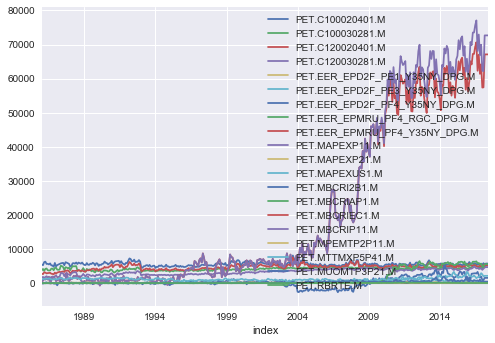

In [217]:
results_rfe.plot()

# RFECV

In [90]:
from sklearn.feature_selection import RFECV

In [115]:
#use linear regression as the model
lr_rfecv = LinearRegression()
rfecv = RFECV(lr_rfecv,step=50)
rfecv.fit(monthly_dataset,y)

RFECV(cv=None,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   n_jobs=1, scoring=None, step=50, verbose=0)

In [173]:
print ("Features sorted by their rank:")
tuple_list_rfecv = (sorted(zip(map(lambda x: round(x, 2), rfecv.ranking_), monthly_dataset.columns)))
# print (tuple_list_rfecv)

Features sorted by their rank:


In [120]:
name_list_rfecv = [x[1] for x in tuple_list_rfecv if x[0] == 1]
name_list_rfecv

['PET.EER_EPD2F_PE1_Y35NY_DPG.M',
 'PET.EER_EPD2F_PE3_Y35NY_DPG.M',
 'PET.EER_EPD2F_PF4_Y35NY_DPG.M',
 'PET.EER_EPMRU_PF4_RGC_DPG.M',
 'PET.EER_EPMRU_PF4_Y35NY_DPG.M',
 'PET.MBCMRP51.M',
 'PET.MBCMXP5P31.M',
 'PET.MBCRI2A1.M',
 'PET.MBCRI2B1.M',
 'PET.MBCRI2C1.M',
 'PET.MBCRIP21.M',
 'PET.MCRIMUSMX2.M',
 'PET.MTTIMUSMX2.M',
 'PET.RBRTE.M']

In [121]:
len(name_list_rfecv)

14

In [220]:
results_rfecv = monthly_dataset[name_list_rfecv]
results_rfecv.tail()

,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.MBCMRP51.M,PET.MBCMXP5P31.M,PET.MBCRI2A1.M,PET.MBCRI2B1.M,PET.MBCRI2C1.M,PET.MBCRIP21.M,PET.MCRIMUSMX2.M,PET.MTTIMUSMX2.M,PET.RBRTE.M
index,,,,,,,,,,,,,,
2017-02-28,1.641,1.660,1.562,1.543,1.547,4606.0,3515.0,3550.0,898.0,-308.0,4140.0,516.0,607.0,54.87
2017-03-31,1.536,1.551,1.492,1.523,1.492,4644.0,3426.0,5192.0,1541.0,306.0,7039.0,550.0,630.0,51.59
2017-04-30,1.590,1.604,1.523,1.621,1.611,4644.0,3426.0,5192.0,1541.0,306.0,7039.0,550.0,630.0,52.31
2017-05-31,1.514,1.527,1.454,1.519,1.540,4644.0,3426.0,5192.0,1541.0,306.0,7039.0,550.0,630.0,50.33
2017-06-30,1.514,1.527,1.454,1.519,1.540,4644.0,3426.0,5192.0,1541.0,306.0,7039.0,550.0,630.0,50.33


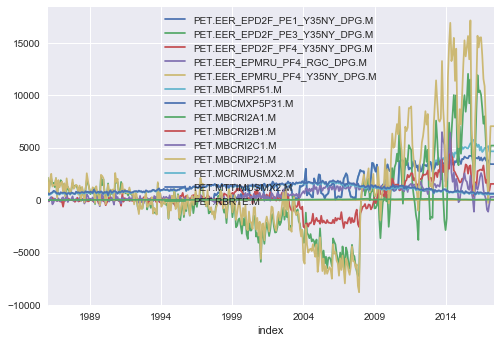

In [221]:
results_rfecv.plot()

### Lets find out what these factors are...

In [124]:
data = pd.read_json('./PET.txt',orient='columns',lines=True,convert_dates=['start','end'])
series_data = data[pd.notnull(data['series_id'])]
series_data = (series_data[['series_id','name','units','description','unitsshort','f','start','end','last_updated']]
 .set_index('series_id')
)
series_data['start']= pd.to_datetime(series_data['start'])
series_data['end']= pd.to_datetime(series_data['end'])

### Pass through list of factors to obtain the description of the factors

In [188]:
series_data.loc[name_list_rfe]

,name,units,description,unitsshort,f,start,end,last_updated
series_id,,,,,,,,
PET.C100020401.M,Oklahoma Total Gasoline All Sales/Deliveries b...,Thousand Gallons per Day,Oklahoma Total Gasoline All Sales/Deliveries b...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:44,2017-06-21T13:54:13-04:00
PET.C100030281.M,Mississippi Total Gasoline All Sales/Deliverie...,Thousand Gallons per Day,Mississippi Total Gasoline All Sales/Deliverie...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:44,2017-06-21T13:54:13-04:00
PET.C120020401.M,Oklahoma Regular Gasoline All Sales/Deliveries...,Thousand Gallons per Day,Oklahoma Regular Gasoline All Sales/Deliveries...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:44,2017-06-21T13:54:13-04:00
PET.C120030281.M,Mississippi Regular Gasoline All Sales/Deliver...,Thousand Gallons per Day,Mississippi Regular Gasoline All Sales/Deliver...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:44,2017-06-21T13:54:13-04:00
PET.EER_EPD2F_PE1_Y35NY_DPG.M,New York Harbor No. 2 Heating Oil Future Contr...,Dollars per Gallon,New York Harbor No. 2 Heating Oil Future Contr...,$/gal,M,1970-01-03 07:00:01,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00
PET.EER_EPD2F_PE3_Y35NY_DPG.M,New York Harbor No. 2 Heating Oil Future Contr...,Dollars per Gallon,New York Harbor No. 2 Heating Oil Future Contr...,$/gal,M,1970-01-03 07:00:01,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00
PET.EER_EPD2F_PF4_Y35NY_DPG.M,New York Harbor No. 2 Heating Oil Spot Price F...,Dollars per Gallon,New York Harbor No. 2 Heating Oil Spot Price FOB,$/gal,M,1970-01-03 07:10:06,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00
PET.EER_EPMRU_PF4_RGC_DPG.M,U.S. Gulf Coast Conventional Gasoline Regular ...,Dollars per Gallon,U.S. Gulf Coast Conventional Gasoline Regular ...,$/gal,M,1970-01-03 07:10:06,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00
PET.EER_EPMRU_PF4_Y35NY_DPG.M,New York Harbor Conventional Gasoline Regular ...,Dollars per Gallon,New York Harbor Conventional Gasoline Regular ...,$/gal,M,1970-01-03 07:10:06,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00


In [189]:
series_data.loc[name_list_rfecv]

,name,units,description,unitsshort,f,start,end,last_updated
series_id,,,,,,,,
PET.EER_EPD2F_PE1_Y35NY_DPG.M,New York Harbor No. 2 Heating Oil Future Contr...,Dollars per Gallon,New York Harbor No. 2 Heating Oil Future Contr...,$/gal,M,1970-01-03 07:00:01,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00
PET.EER_EPD2F_PE3_Y35NY_DPG.M,New York Harbor No. 2 Heating Oil Future Contr...,Dollars per Gallon,New York Harbor No. 2 Heating Oil Future Contr...,$/gal,M,1970-01-03 07:00:01,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00
PET.EER_EPD2F_PF4_Y35NY_DPG.M,New York Harbor No. 2 Heating Oil Spot Price F...,Dollars per Gallon,New York Harbor No. 2 Heating Oil Spot Price FOB,$/gal,M,1970-01-03 07:10:06,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00
PET.EER_EPMRU_PF4_RGC_DPG.M,U.S. Gulf Coast Conventional Gasoline Regular ...,Dollars per Gallon,U.S. Gulf Coast Conventional Gasoline Regular ...,$/gal,M,1970-01-03 07:10:06,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00
PET.EER_EPMRU_PF4_Y35NY_DPG.M,New York Harbor Conventional Gasoline Regular ...,Dollars per Gallon,New York Harbor Conventional Gasoline Regular ...,$/gal,M,1970-01-03 07:10:06,1970-01-03 08:01:45,2017-06-14T13:17:45-04:00
PET.MBCMRP51.M,"West Coast (PADD 5) Receipts by Pipeline, Tank...",Thousand Barrels,"West Coast (PADD 5) Receipts by Pipeline, Tank...",MBBL,M,1970-01-03 07:10:01,1970-01-03 08:01:43,2017-05-31T14:08:18-04:00
PET.MBCMXP5P31.M,"West Coast (PADD 5) Receipts by Pipeline, Tank...",Thousand Barrels,"West Coast (PADD 5) Receipts by Pipeline, Tank...",MBBL,M,1970-01-03 07:10:01,1970-01-03 08:01:43,2017-05-31T14:08:18-04:00
PET.MBCRI2A1.M,Refining District Indiana-Illinois-Kentucky Re...,Thousand Barrels,Refining District Indiana-Illinois-Kentucky Re...,Mbbl,M,1970-01-03 07:10:01,1970-01-03 08:01:43,2017-05-31T14:08:18-04:00
PET.MBCRI2B1.M,Refining District Minnesota-Wisconsin-North Da...,Thousand Barrels,Refining District Minnesota-Wisconsin-North Da...,Mbbl,M,1970-01-03 07:10:01,1970-01-03 08:01:43,2017-05-31T14:08:18-04:00


In [200]:
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, preprocessing 
# results_rfe = preprocessing.scale(results_rfe)
results_rfe.tail()

,PET.C100020401.M,PET.C100030281.M,PET.C120020401.M,PET.C120030281.M,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.MAPEXP11.M,PET.MAPEXP21.M,PET.MAPEXUS1.M,PET.MBCRI2B1.M,PET.MBCRIAP1.M,PET.MBCRIEC1.M,PET.MBCRIP11.M,PET.MPEMTP2P11.M,PET.MTTMXP5P41.M,PET.MUOMTP3P21.M,PET.RBRTE.M
index,,,,,,,,,,,,,,,,,,,,
2017-02-28,5854.3,4643.3,5365.3,4261.0,1.641,1.660,1.562,1.543,1.547,89.0,30.0,494.0,898.0,4746.0,57435.0,62181.0,62.0,1966.0,460.0,54.87
2017-03-31,5495.1,5076.7,4967.1,4591.3,1.536,1.551,1.492,1.523,1.492,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,51.59
2017-04-30,5746.0,5214.1,5194.3,4705.0,1.590,1.604,1.523,1.621,1.611,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,52.31
2017-05-31,5746.0,5214.1,5194.3,4705.0,1.514,1.527,1.454,1.519,1.540,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,50.33
2017-06-30,5746.0,5214.1,5194.3,4705.0,1.514,1.527,1.454,1.519,1.540,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,50.33


In [207]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(results_rfe[:-5], y[:-5], test_size=0.2)
lr_rfe.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
lr_rfe.score(X_test,y_test)

0.98986940641609811

In [209]:
results_rfe[-5:]

,PET.C100020401.M,PET.C100030281.M,PET.C120020401.M,PET.C120030281.M,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.MAPEXP11.M,PET.MAPEXP21.M,PET.MAPEXUS1.M,PET.MBCRI2B1.M,PET.MBCRIAP1.M,PET.MBCRIEC1.M,PET.MBCRIP11.M,PET.MPEMTP2P11.M,PET.MTTMXP5P41.M,PET.MUOMTP3P21.M,PET.RBRTE.M
index,,,,,,,,,,,,,,,,,,,,
2017-02-28,5854.3,4643.3,5365.3,4261.0,1.641,1.660,1.562,1.543,1.547,89.0,30.0,494.0,898.0,4746.0,57435.0,62181.0,62.0,1966.0,460.0,54.87
2017-03-31,5495.1,5076.7,4967.1,4591.3,1.536,1.551,1.492,1.523,1.492,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,51.59
2017-04-30,5746.0,5214.1,5194.3,4705.0,1.590,1.604,1.523,1.621,1.611,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,52.31
2017-05-31,5746.0,5214.1,5194.3,4705.0,1.514,1.527,1.454,1.519,1.540,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,50.33
2017-06-30,5746.0,5214.1,5194.3,4705.0,1.514,1.527,1.454,1.519,1.540,106.0,84.0,358.0,1541.0,5574.0,67103.0,72677.0,110.0,2143.0,452.0,50.33


In [210]:
lr_rfe.predict(results_rfe[-5:])

array([ 53.18805104,  48.92399885,  50.93132222,  48.16994591,  48.16994591])

In [211]:
y[-5:]

array([ 53.47,  49.33,  51.06,  48.48,  48.48])